# Sea Level Predictor

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [7]:
 df = pd.read_csv('epa-sea-level.csv')

In [8]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


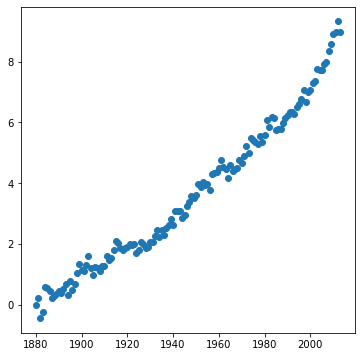

In [12]:
#Create scatter plot
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
fig, ax = plt.subplots(figsize=(6,6))
ax = plt.scatter(x, y)

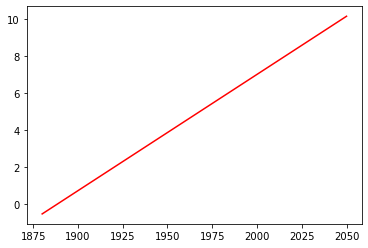

In [15]:
# Create first line of best fit
slope, intercept, r_value, p_value, stderr = linregress(x, y)
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = slope*x_pred + intercept
plt.plot(x_pred, y_pred, 'r')


In [17]:
# Create second line of best fit
df_forecast = df.loc[df['Year'] >= 2000]
x_forecast = df_forecast['Year']
y_forecast = df_forecast['CSIRO Adjusted Sea Level']

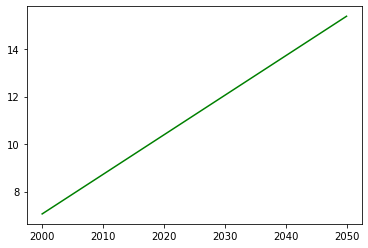

In [18]:
# get new slope + intercept
slope, intercept, r_value, p_value, stderr = linregress(x_forecast, y_forecast)
x_pred2 = pd.Series([i for i in range(2000, 2051)])
y_pred2 = slope*x_pred2 + intercept
plt.plot(x_pred2, y_pred2, 'green')

Text(0, 0.5, 'Sea Level (inches)')

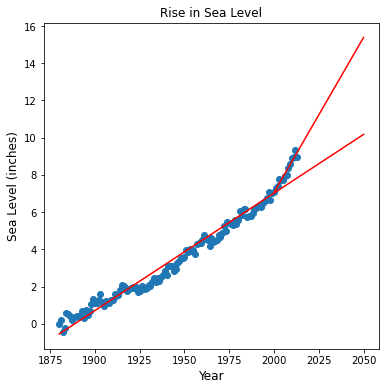

In [20]:
#First scatter plot
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
fig, ax = plt.subplots(figsize=(6,6))
ax = plt.scatter(x, y)
#Line plot from 1880 TO 2050
plt.plot(x_pred, y_pred, 'r')
#Line plot from 2000 to 2050
plt.plot(x_pred2, y_pred2, 'r')
# Add labels and title
plt.title('Rise in Sea Level')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sea Level (inches)', fontsize = 12)